<a href="https://colab.research.google.com/github/Yash1289/CoronaVirus_Tweet_Sentiment/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [135]:
import numpy as np
import pandas as pd
import re

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
path = "/content/drive/MyDrive/Coronavirus Tweets.csv"
corona_df = pd.read_csv(path , engine = "python")

In [138]:
corona_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know its getting tough when @KameronWilds...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [139]:
corona_df["Location"] = corona_df["Location"].str.strip()
corona_df["Location"] = corona_df["Location"].str.capitalize()
corona_df["Location"] = corona_df["Location"].str.strip()

In [140]:
corona_df[corona_df["Location"] == "london"]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment


In [141]:
corona_df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [142]:
def cityFinder(location):
  if isinstance(location, str):
    cityAndOthers = re.split(r"-|,|/", location)
    return cityAndOthers[0]
  else:
    return location

In [143]:
corona_df["Location"] = corona_df["Location"].apply(cityFinder)

In [144]:
corona_df[corona_df["Location"] == "London, England"]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment


In [145]:
def SpamLocationRemover(location):
  if isinstance(location, str):
    clearLocation = re.sub("[^a-zA-Z\s]", "" , location)
    return clearLocation
  else:
    return location

In [146]:
corona_df["Location"] = corona_df["Location"].apply(SpamLocationRemover)

In [147]:
corona_df["Location"] = corona_df["Location"].str.strip()

In [148]:
corona_df["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [149]:
def Sentiment_Grouping(sentiment):
  if sentiment == "Extremely Positive":
    return "Positive"
  elif sentiment == "Extremely Negative":
    return "Negative"
  else:
    return sentiment

In [150]:
corona_df["Sentiment"] = corona_df["Sentiment"].apply(Sentiment_Grouping)

In [151]:
corona_df["Sentiment"].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [152]:
sentiment_grouping = corona_df.groupby(["Location" , "Sentiment"]).agg({ "OriginalTweet" : "count"}).reset_index()
sentiment_pivot = sentiment_grouping.pivot(index = "Location" , columns="Sentiment" , values="OriginalTweet")
sentiment_pivot

Sentiment,Negative,Neutral,Positive
Location,,,
,158.0,87.0,153.0
A,NaN,1.0,1.0
A big gay world of my own,NaN,1.0,NaN
A blasted heath,NaN,1.0,NaN
A box,1.0,1.0,NaN
...,...,...,...
xcf,NaN,NaN,1.0
yonge st,2.0,2.0,2.0
yonge street,1.0,NaN,1.0


In [153]:
sentiment_pivot.fillna(0, inplace = True)
sentiment_pivot

Sentiment,Negative,Neutral,Positive
Location,,,
,158.0,87.0,153.0
A,0.0,1.0,1.0
A big gay world of my own,0.0,1.0,0.0
A blasted heath,0.0,1.0,0.0
A box,1.0,1.0,0.0
...,...,...,...
xcf,0.0,0.0,1.0
yonge st,2.0,2.0,2.0
yonge street,1.0,0.0,1.0


In [154]:
sentiment_pivot = sentiment_pivot.apply(lambda x: round(x*100/sum(x),2) if sum(x) > 10 else (x)*0, axis=1)
sentiment_pivot

Sentiment,Negative,Neutral,Positive
Location,,,
,39.7,21.86,38.44
A,0.0,0.00,0.00
A big gay world of my own,0.0,0.00,0.00
A blasted heath,0.0,0.00,0.00
A box,0.0,0.00,0.00
...,...,...,...
xcf,0.0,0.00,0.00
yonge st,0.0,0.00,0.00
yonge street,0.0,0.00,0.00


In [155]:
sentiment_pivot["SentimentDiff"] = sentiment_pivot["Positive"] - sentiment_pivot["Negative"]

In [156]:
sentiment_pivot

Sentiment,Negative,Neutral,Positive,SentimentDiff
Location,,,,
,39.7,21.86,38.44,-1.26
A,0.0,0.00,0.00,0.00
A big gay world of my own,0.0,0.00,0.00,0.00
A blasted heath,0.0,0.00,0.00,0.00
A box,0.0,0.00,0.00,0.00
...,...,...,...,...
xcf,0.0,0.00,0.00,0.00
yonge st,0.0,0.00,0.00,0.00
yonge street,0.0,0.00,0.00,0.00


In [157]:
sentimentBackup = sentiment_pivot.copy()

In [158]:
def Location_Cat(positivePercent):
  if positivePercent <= 55.0 and positivePercent >=45.0 :
    return 0
  elif positivePercent <= 70.0 and positivePercent >55.0 :
    return 1
  elif positivePercent <= 100.0 and positivePercent > 70 :
    return 2
  elif positivePercent < 45.0 and positivePercent >= 30 :
    return -1
  elif positivePercent < 30.0 and positivePercent >= 0 :
    return -2

In [159]:
def Location_Cat3(sRow) :
  if (sRow["Neutral"] >= sRow["Positive"] and sRow["Neutral"] >= sRow["Negative"]) or abs(sRow["SentimentDiff"]) <= 15:
    return 0
  elif sRow["SentimentDiff"] >30 :
    return 2
  elif sRow["SentimentDiff"] >10 :
    return 1
  elif sRow["SentimentDiff"] < -30:
    return -2
  elif sRow["SentimentDiff"] < -10:
    return -1

In [160]:
sentimentBackup = sentimentBackup.reset_index().rename_axis(None, axis=1)

In [161]:
sentimentBackup

,Location,Negative,Neutral,Positive,SentimentDiff
0,,39.7,21.86,38.44,-1.26
1,A,0.0,0.00,0.00,0.00
2,A big gay world of my own,0.0,0.00,0.00,0.00
3,A blasted heath,0.0,0.00,0.00,0.00
4,A box,0.0,0.00,0.00,0.00
...,...,...,...,...,...
8167,xcf,0.0,0.00,0.00,0.00
8168,yonge st,0.0,0.00,0.00,0.00
8169,yonge street,0.0,0.00,0.00,0.00
8170,yvr yyz yul,0.0,0.00,0.00,0.00


In [162]:
sentimentBackup["LocationCat"] = sentimentBackup.apply(Location_Cat3 , axis = 1)

In [163]:
sentimentBackup

,Location,Negative,Neutral,Positive,SentimentDiff,LocationCat
0,,39.7,21.86,38.44,-1.26,0
1,A,0.0,0.00,0.00,0.00,0
2,A big gay world of my own,0.0,0.00,0.00,0.00,0
3,A blasted heath,0.0,0.00,0.00,0.00,0
4,A box,0.0,0.00,0.00,0.00,0
...,...,...,...,...,...,...
8167,xcf,0.0,0.00,0.00,0.00,0
8168,yonge st,0.0,0.00,0.00,0.00,0
8169,yonge street,0.0,0.00,0.00,0.00,0
8170,yvr yyz yul,0.0,0.00,0.00,0.00,0


In [164]:
corona_new_df = pd.merge(corona_df , sentimentBackup , how = "left" , on = "Location")

In [165]:
corona_new_df.drop(columns = ["Negative" , "Positive" , "Neutral" , "SentimentDiff"] , axis = 1 , inplace = True)

In [166]:
corona_new_df["Location"].fillna("Unknown" , inplace = True)
corona_new_df["LocationCat"].fillna(0 , inplace = True)

In [167]:
corona_new_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,LocationCat
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0
1,3800,48752,Uk,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0.0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0.0
3,3802,48754,Unknown,16-03-2020,My food stock is not the only one which is emp...,Positive,0.0
4,3803,48755,Unknown,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,0.0
...,...,...,...,...,...,...,...
41152,44951,89903,Wellington city,14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,0.0
41153,44952,89904,Unknown,14-04-2020,Response to complaint not provided citing COVI...,Negative,0.0
41154,44953,89905,Unknown,14-04-2020,You know its getting tough when @KameronWilds...,Positive,0.0
41155,44954,89906,Unknown,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,0.0


In [168]:
pd.DataFrame(corona_new_df.dtypes).rename(columns = {0:'dtype'})

,dtype
UserName,int64
ScreenName,int64
Location,object
TweetAt,object
OriginalTweet,object
Sentiment,object
LocationCat,float64


In [169]:
corona_new_df["TweetAt"] = pd.to_datetime(corona_new_df["TweetAt"])

In [170]:
corona_new_df["Month"] = corona_new_df["TweetAt"].apply(lambda x : x.month)
corona_new_df["Year"] = corona_new_df["TweetAt"].apply(lambda x : x.year)

In [171]:
corona_new_df["TweetAt"].max()

Timestamp('2020-12-04 00:00:00')

In [172]:
corona_new_df["TweetAt"].min()

Timestamp('2020-01-04 00:00:00')

In [173]:
corona_new_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,LocationCat,Month,Year
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0,3,2020
1,3800,48752,Uk,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0.0,3,2020
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0.0,3,2020
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,0.0,3,2020
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,0.0,3,2020
...,...,...,...,...,...,...,...,...,...
41152,44951,89903,Wellington city,2020-04-14,Airline pilots offering to stock supermarket s...,Neutral,0.0,4,2020
41153,44952,89904,Unknown,2020-04-14,Response to complaint not provided citing COVI...,Negative,0.0,4,2020
41154,44953,89905,Unknown,2020-04-14,You know its getting tough when @KameronWilds...,Positive,0.0,4,2020
41155,44954,89906,Unknown,2020-04-14,Is it wrong that the smell of hand sanitizer i...,Neutral,0.0,4,2020


##**EDA Section**

In [ ]:
corona_eda_df = corona_new_df.copy()

In [ ]:
#Importing the seaborn and matplotlib library for our data visualization tasks
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Setting different parameters of matplotlib and seaborn for better visualization 
plt.rcParams['figure.figsize'] = 10,7
sns.set_context('paper', font_scale=1.4)
sns.set_theme(style='darkgrid')

In [ ]:
sns.barplot

In [ ]:
corona_new_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,LocationCat,Month,Year
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0,3,2020
1,3800,48752,Uk,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0.0,3,2020
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0.0,3,2020
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,0.0,3,2020
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,0.0,3,2020
...,...,...,...,...,...,...,...,...,...
41152,44951,89903,Wellington city,2020-04-14,Airline pilots offering to stock supermarket s...,Neutral,0.0,4,2020
41153,44952,89904,Unknown,2020-04-14,Response to complaint not provided citing COVI...,Negative,0.0,4,2020
41154,44953,89905,Unknown,2020-04-14,You know its getting tough when @KameronWilds...,Positive,0.0,4,2020
41155,44954,89906,Unknown,2020-04-14,Is it wrong that the smell of hand sanitizer i...,Neutral,0.0,4,2020


In [ ]:
neutral_tweets = corona_new_df[corona_new_df["Sentiment"] == 'Neutral']

In [43]:
import matplotlib.pyplot as plt


###**Text Cleaning Model Implementation**

In [174]:
from textblob import TextBlob, Word

In [175]:
corona_model_df = corona_new_df.copy()

In [176]:
def remove_usernames_links(tweet):
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('http[^\s]+','',tweet)
    tweet = re.sub(r'\r+|\n+','',tweet)
    return tweet


In [177]:
corona_model_df["CleanedTweet"] = corona_model_df["OriginalTweet"].apply(remove_usernames_links)

In [178]:
def extract_hash_tags(s):
  return " ".join(part[1:] for part in s.split() if part.startswith('#'))


In [179]:
corona_model_df["hashtags"] = corona_model_df["CleanedTweet"].apply(extract_hash_tags)

In [180]:
def remove_spam(tweet):
    tweet = re.sub('[^a-zA-Z0-9\s]+','',tweet)
    return tweet

In [181]:
corona_model_df["CleanedTweet"] = corona_model_df["CleanedTweet"].apply(remove_spam)

In [182]:
corona_model_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,LocationCat,Month,Year,CleanedTweet,hashtags
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0,3,2020,and and,
1,3800,48752,Uk,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0.0,3,2020,advice Talk to your neighbours family to excha...,
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0.0,3,2020,Coronavirus Australia Woolworths to give elder...,
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,0.0,3,2020,My food stock is not the only one which is emp...,COVID_19 COVID19 coronavirus confinement Confi...
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,0.0,3,2020,Me ready to go at supermarket during the COVID...,COVID19 coronavirus restezchezvous StayAtHome ...
...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,Wellington city,2020-04-14,Airline pilots offering to stock supermarket s...,Neutral,0.0,4,2020,Airline pilots offering to stock supermarket s...,NZ COVID-19
41153,44952,89904,Unknown,2020-04-14,Response to complaint not provided citing COVI...,Negative,0.0,4,2020,Response to complaint not provided citing COVI...,
41154,44953,89905,Unknown,2020-04-14,You know its getting tough when @KameronWilds...,Positive,0.0,4,2020,You know its getting tough when is rationing...,coronavirus toiletpaper
41155,44954,89906,Unknown,2020-04-14,Is it wrong that the smell of hand sanitizer i...,Neutral,0.0,4,2020,Is it wrong that the smell of hand sanitizer i...,COVID19 coronavirus


In [183]:
#label encoding
encoders_nums = {"Sentiment":{"Positive":1,
                              "Neutral":0,
                              "Negative":-1,
                              }}        
corona_model_df = corona_model_df.replace(encoders_nums)

In [184]:
neutral_tweets = corona_model_df[corona_model_df["Sentiment"] == 0]

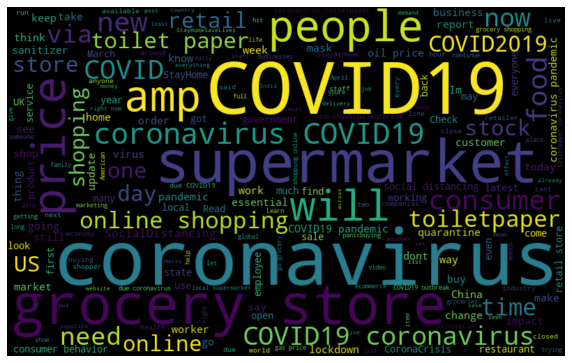

In [185]:
# create text from all tweets
all_words = ' '.join([text for text in neutral_tweets['CleanedTweet'] ])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [186]:
negative_tweets = corona_model_df[corona_model_df["Sentiment"] == 0]

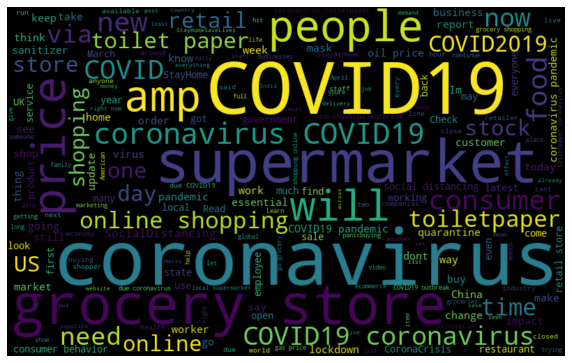

In [187]:
# create text from all tweets
all_words = ' '.join([text for text in negative_tweets['CleanedTweet'] ])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

###Tokenization

In [188]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [189]:
import string
from nltk.corpus import stopwords

In [190]:
stops = set(stopwords.words('english'))
print(stops)

{'mustn', 'himself', 'by', 'how', 'hadn', 'there', 'won', 'where', 'doing', 'from', 'here', 'it', 's', 'has', 'not', 'itself', "mightn't", 'with', 'd', "needn't", 'other', 'out', 'this', 'these', 'themselves', 'll', 'you', 'if', "that'll", 'most', "won't", 'can', 'own', 'ain', 'been', "it's", "she's", "didn't", 'so', 'through', 'until', "doesn't", 'between', 'nor', 'and', 'such', 'myself', 'yours', 'y', 'doesn', 'no', 'the', 'them', 'a', 'him', "isn't", 'now', 'have', 'yourself', 'had', "you'll", 'hasn', 'whom', 'does', 'mightn', 'theirs', 're', 'at', 'because', 'be', 'than', 'didn', 'is', 'herself', 'he', "aren't", 'were', 'ours', 'then', 'in', 'its', 'couldn', 'but', 've', 'when', "you've", 'each', 'under', 'about', 'only', 'shouldn', 'she', 'hers', 'all', 'just', 'during', "mustn't", "you'd", 'into', 'above', 'further', 'an', "hasn't", 'on', "hadn't", "haven't", 'below', 'which', 'down', 'same', 'off', 'who', 'will', 'after', "couldn't", 'did', 'their', 'ourselves', 'they', 'that', 

In [191]:
def text_process(msg):
    whitelist = ["n't", "not", "no" , "nor" , "couldn't" , "wouldn't" ,"isn't" , "haven't" , "wasn't" , "didn't" , "hasn't" , "shouldn't" , "doesn't" , "weren't" ,
                 "aren't"]
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if (word.lower() not in stopwords.words('english') or word.lower() in whitelist)])

In [192]:
corona_model_df['tokenized_tweet'] = corona_model_df['CleanedTweet'].apply(text_process)

##Lemmatization

In [193]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [194]:
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [195]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [196]:
from nltk.corpus import wordnet

In [197]:
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

In [198]:
corona_model_df["lemmatized_tweet"] = corona_model_df["tokenized_tweet"].apply(lemmatize_with_postag)

In [69]:
from nltk.stem import PorterStemmer

In [ ]:
def stemming(input_text):
        porter = PorterStemmer()
        words = input_text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)

In [ ]:
corona_model_df["stemmed_tweet"] = corona_model_df["tokenized_tweet"].apply(lemmatize_with_postag)

### apply

In [ ]:
corona_model_df

In [486]:
corona_final_df = corona_model_df.copy()

In [487]:
def elongated_words(sentiment_analysis):
  match_elongated = re.sub(r'(.)\1\1{1,}',r'\1', sentiment_analysis)
  return match_elongated

In [488]:
corona_final_df["lemmatized_tweet"] = corona_final_df["lemmatized_tweet"].apply(elongated_words)

In [489]:
corona_final_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,LocationCat,Month,Year,CleanedTweet,hashtags,tokenized_tweet,lemmatized_tweet
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,0.0,3,2020,and and,,,
1,3800,48752,Uk,2020-03-16,advice Talk to your neighbours family to excha...,1,0.0,3,2020,advice Talk to your neighbours family to excha...,,advice Talk neighbours family exchange phone n...,advice Talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,1,0.0,3,2020,Coronavirus Australia Woolworths to give elder...,,Coronavirus Australia Woolworths give elderly ...,Coronavirus Australia Woolworths give elderly ...
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,1,0.0,3,2020,My food stock is not the only one which is emp...,COVID_19 COVID19 coronavirus confinement Confi...,food stock not one emptyPLEASE dont panic ENOU...,food stock not one emptyPLEASE dont panic ENOU...
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",-1,0.0,3,2020,Me ready to go at supermarket during the COVID...,COVID19 coronavirus restezchezvous StayAtHome ...,ready go supermarket COVID19 outbreakNot Im pa...,ready go supermarket COVID19 outbreakNot Im pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,Wellington city,2020-04-14,Airline pilots offering to stock supermarket s...,0,0.0,4,2020,Airline pilots offering to stock supermarket s...,NZ COVID-19,Airline pilots offering stock supermarket shel...,Airline pilot offer stock supermarket shelf NZ...
41153,44952,89904,Unknown,2020-04-14,Response to complaint not provided citing COVI...,-1,0.0,4,2020,Response to complaint not provided citing COVI...,,Response complaint not provided citing COVID19...,Response complaint not provide cite COVID19 re...
41154,44953,89905,Unknown,2020-04-14,You know its getting tough when @KameronWilds...,1,0.0,4,2020,You know its getting tough when is rationing...,coronavirus toiletpaper,know getting tough rationing toilet paper coro...,know get tough rationing toilet paper coronavi...
41155,44954,89906,Unknown,2020-04-14,Is it wrong that the smell of hand sanitizer i...,0,0.0,4,2020,Is it wrong that the smell of hand sanitizer i...,COVID19 coronavirus,wrong smell hand sanitizer starting turn oncor...,wrong smell hand sanitizer start turn oncorona...


In [ ]:

neutral_tweets = corona_final_df[corona_model_df["Sentiment"] == 0].index
corona_final_df.drop(neutral_tweets , inplace=True )

In [490]:
corona_final_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'LocationCat', 'Month', 'Year', 'CleanedTweet', 'hashtags',
       'tokenized_tweet', 'lemmatized_tweet'],
      dtype='object')

In [491]:
corona_final_df = corona_final_df.drop(columns = ["UserName" , "ScreenName" , "Location" , "TweetAt" , "OriginalTweet" , "CleanedTweet" , "tokenized_tweet", "Year"] , axis = 1 )

In [492]:
corona_final_df.columns

Index(['Sentiment', 'LocationCat', 'Month', 'hashtags', 'lemmatized_tweet'], dtype='object')

In [493]:
corona_final_df["lemmatized_tweet"] = corona_final_df["lemmatized_tweet"].str.lower()

In [494]:
corona_final_df["hashtags"] = corona_final_df["hashtags"].str.lower()

In [495]:
training_columns = list(set(corona_final_df.columns) - {"Sentiment" , "stemmed_tweet"})
training_columns

['Month', 'hashtags', 'lemmatized_tweet', 'LocationCat']

In [496]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [497]:
vectorizer1 = TfidfVectorizer(lowercase=True, max_df = 0.90 , max_features = 4500)
vectorizer2 = TfidfVectorizer(max_features = 2000)

In [498]:
from sklearn.feature_extraction.text import CountVectorizer

In [500]:
vectorizer11 = CountVectorizer( ngram_range=(1,3))
vectorizer22 = CountVectorizer(max_features = 2000)

In [501]:
X = corona_final_df[training_columns]

In [502]:
Y = corona_final_df["Sentiment"]

In [470]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=150)

In [503]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [504]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [505]:
column_transformer = ColumnTransformer(
      [('vec1', vectorizer11, 'lemmatized_tweet'), 
    ('vec2', vectorizer22, 'hashtags')],
    remainder='passthrough')

In [506]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(max_iter = 2000 , C = 2.5)

In [336]:
from sklearn.svm import SVC

model3 = SVC( C = 5)

In [ ]:
pipe = Pipeline([
                  ('vec', column_transformer),
                  ('clf', model)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf1',
                                                  TfidfVectorizer(max_df=0.9,
                                                                  max_features=4500),
                                                  'lemmatized_tweet'),
                                                 ('tfidf2',
                                                  TfidfVectorizer(max_features=2000),
                                                  'hashtags')])),
                ('clf', RandomForestClassifier(n_estimators=150))])

In [507]:
pipe2 = Pipeline([
                  ('vec', column_transformer),
                  ('clf', model2)
                ])
pipe2.fit(X_train,y_train)

Pipeline(steps=[('vec',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vec1',
                                                  CountVectorizer(ngram_range=(1,
                                                                               3)),
                                                  'lemmatized_tweet'),
                                                 ('vec2',
                                                  CountVectorizer(max_features=2000),
                                                  'hashtags')])),
                ('clf', LogisticRegression(C=2.5, max_iter=2000))])

In [337]:
pipe3 = Pipeline([
                  ('tfidf', column_transformer),
                  ('clf', model3)
                ])
pipe3.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf1',
                                                  TfidfVectorizer(max_df=0.9,
                                                                  max_features=4500),
                                                  'lemmatized_tweet'),
                                                 ('tfidf2',
                                                  TfidfVectorizer(max_features=2000),
                                                  'hashtags')])),
                ('clf', SVC(C=5))])

###end

In [312]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [313]:
# HYperparameter Grid
param_dict = {'clf__C': [2,2.5,3,4,5],
              }

kfold = StratifiedKFold(n_splits=2)


# Create an instance of the RandomForestRegressor
rf_model = GridSearchCV(pipe3 , param_grid=param_dict , cv = kfold , return_train_score=True, verbose=1)

rf_model.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('tfidf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tfidf1',
                                                                         TfidfVectorizer(max_df=0.9,
                                                                                         max_features=4500),
                                                                         'lemmatized_tweet'),
                                                                        ('tfidf2',
                                                                         TfidfVectorizer(max_features=2000),
                                                                         'hashtags')])),
                                       ('clf', SVC(C=2.5))]),
             param_grid={'clf__C': [2, 2.5, 3, 4, 5]}, retu

In [ ]:
pipe.score(X_train ,y_train)

0.9996051632498102

In [318]:
rf_model.best_params_

{'clf__C': 5}

In [ ]:
train_preds = pipe.predict(X_train)

In [314]:
test_preds_1 = rf_model.predict(X_test)

In [ ]:
test_preds = pipe.predict(X_test)

In [508]:
test_preds2 = pipe2.predict(X_test)

In [338]:
test_preds3 = pipe3.predict(X_test)

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [340]:
print(classification_report(y_test,test_preds3))

              precision    recall  f1-score   support

          -1       0.76      0.79      0.78      3097
           0       0.72      0.51      0.60      1537
           1       0.76      0.83      0.80      3598

    accuracy                           0.76      8232
   macro avg       0.75      0.71      0.72      8232
weighted avg       0.76      0.76      0.75      8232



In [454]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.83      0.79      0.81      3155
           0       0.69      0.72      0.70      1531
           1       0.82      0.83      0.83      3546

    accuracy                           0.80      8232
   macro avg       0.78      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



In [316]:
print(classification_report(y_test,test_preds_1))

              precision    recall  f1-score   support

          -1       0.84      0.82      0.83      3089
           1       0.85      0.87      0.86      3600

    accuracy                           0.85      6689
   macro avg       0.85      0.84      0.84      6689
weighted avg       0.85      0.85      0.85      6689



In [309]:
print(classification_report(y_test,test_preds3))

              precision    recall  f1-score   support

          -1       0.84      0.79      0.81      3089
           1       0.83      0.87      0.85      3600

    accuracy                           0.83      6689
   macro avg       0.83      0.83      0.83      6689
weighted avg       0.83      0.83      0.83      6689



In [429]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.87      0.84      0.85      3136
           1       0.86      0.89      0.87      3553

    accuracy                           0.86      6689
   macro avg       0.87      0.86      0.86      6689
weighted avg       0.86      0.86      0.86      6689



In [421]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.86      0.83      0.84      3136
           1       0.86      0.88      0.87      3553

    accuracy                           0.86      6689
   macro avg       0.86      0.86      0.86      6689
weighted avg       0.86      0.86      0.86      6689



In [218]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.80      0.80      0.80      3095
           0       0.70      0.66      0.68      1495
           1       0.81      0.84      0.82      3642

    accuracy                           0.79      8232
   macro avg       0.77      0.76      0.77      8232
weighted avg       0.79      0.79      0.79      8232



In [91]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.88      0.83      0.85      3192
           1       0.85      0.89      0.87      3497

    accuracy                           0.86      6689
   macro avg       0.87      0.86      0.86      6689
weighted avg       0.86      0.86      0.86      6689



In [94]:
accuracy_score(y_test,test_preds2)

0.8641052474211391

In [453]:
accuracy_score(y_test,test_preds2)

0.7959183673469388

In [430]:
accuracy_score(y_test,test_preds2)

0.8647032441321573

In [317]:
accuracy_score(y_test,test_preds_1)

0.845716848557333

In [341]:
accuracy_score(y_test,test_preds3)

0.7581389698736638

In [ ]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.80      0.79      0.80      3016
           0       0.69      0.66      0.68      1540
           1       0.82      0.83      0.83      3676

    accuracy                           0.79      8232
   macro avg       0.77      0.76      0.77      8232
weighted avg       0.79      0.79      0.79      8232



In [ ]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.79      0.80      0.79      3016
           0       0.70      0.65      0.67      1540
           1       0.81      0.84      0.82      3676

    accuracy                           0.79      8232
   macro avg       0.77      0.76      0.76      8232
weighted avg       0.78      0.79      0.78      8232



In [ ]:
print(classification_report(y_test,test_preds2))

              precision    recall  f1-score   support

          -1       0.79      0.80      0.79      3016
           0       0.70      0.62      0.66      1540
           1       0.81      0.84      0.82      3676

    accuracy                           0.78      8232
   macro avg       0.77      0.75      0.76      8232
weighted avg       0.78      0.78      0.78      8232



In [ ]:
accuracy_score(y_test,test_preds2)

0.7855928085519922

In [ ]:
accuracy_score(y_test,test_preds2)

0.7874149659863946

In [ ]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

          -1       0.76      0.74      0.75      3016
           0       0.65      0.59      0.62      1540
           1       0.75      0.80      0.77      3676

    accuracy                           0.74      8232
   macro avg       0.72      0.71      0.71      8232
weighted avg       0.74      0.74      0.74      8232



In [ ]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

          -1       0.76      0.75      0.75      3090
           0       0.66      0.61      0.64      1562
           1       0.75      0.78      0.76      3580

    accuracy                           0.74      8232
   macro avg       0.72      0.71      0.72      8232
weighted avg       0.74      0.74      0.74      8232



In [93]:
from sklearn.metrics import accuracy_score

#accuracy_score(y_test,test_preds)

In [ ]:
accuracy_score(y_test,test_preds)

0.7371234207968902

In [ ]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

          -1       0.76      0.73      0.74      3091
           0       0.64      0.57      0.60      1512
           1       0.74      0.80      0.77      3629

    accuracy                           0.73      8232
   macro avg       0.71      0.70      0.70      8232
weighted avg       0.73      0.73      0.73      8232



In [ ]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

          -1       0.75      0.73      0.74      3111
           0       0.65      0.59      0.62      1515
           1       0.74      0.79      0.77      3606

    accuracy                           0.73      8232
   macro avg       0.72      0.70      0.71      8232
weighted avg       0.73      0.73      0.73      8232



In [ ]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

          -1       0.76      0.74      0.75      3031
           0       0.64      0.59      0.61      1558
           1       0.75      0.79      0.77      3643

    accuracy                           0.73      8232
   macro avg       0.71      0.71      0.71      8232
weighted avg       0.73      0.73      0.73      8232



In [ ]:
from sklearn.naive_bayes import  GaussianNB

model1 = GaussianNB()

In [ ]:
class Densifier(object):
  def fit(self, X, y=None):
    pass
  def fit_transform(self, X, y=None):
    return self.transform(X)
  def transform(self, X, y=None):
    return X.toarray()

In [ ]:
pipe = Pipeline([ 
                 ('tfidf', column_transformer),
                 ('to_dense', Densifier()),
                  ('classify', model1)
                ])
pipe.fit(X_train ,y_train)

In [398]:
sentiment_analysis = ["I awesoomee looovvveee this guy he is  " , "My friends is a muccch better dancer than he ever will be"]

In [351]:
# Complete the regex to match an elongated word
regex_elongated = r"\w*(\w)\1\w*"

for tweet in sentiment_analysis:
  # Find if there is a match in each tweet 
  match_elongated = re.search(regex_elongated, tweet)
	if match_elongated:
		# Assign the captured group zero 
		elongated_word = match_elongated.group(0)
        
		# Complete the format method to print the word
		print("Elongated word found: {word}".format(word=elongated_word))
	else:
		print("No elongated word found")    

TabError: ignored

In [357]:
# Complete the regex to match an elongated word
regex_elongated = r"\w*(\w)\1\w*"

for tweet in sentiment_analysis:
	# Find if there is a match in each tweet 
	match_elongated = re.search(regex_elongated, tweet)

	if match_elongated:
		# Assign the captured group zero 
		elongated_word = match_elongated.group(0)
        
		# Complete the format method to print the word
		print("Elongated word found: {word}".format(word=elongated_word))
	else:
		print("No elongated word found")     	

Elongated word found: awesoomee
Elongated word found: muccch


In [480]:


for tweet in sentiment_analysis:
  match_elongated = re.sub(r'(.)\1\1{1,}',r'\1', tweet)
  print(match_elongated)
 

I awesoomee love this guy he is  
My friends is a much better dancer than he ever will be


In [382]:
hello= "awesoomee"

In [383]:
word = re.sub(r"(.)\1{1,}",r'\1', hello)

In [384]:
word

'awesome'

In [483]:
def elongated_words(sentiment_analysis):
  match_elongated = re.sub(r'(.)\1\1{1,}',r'\1', sentiment_analysis)
  return match_elongated

In [484]:
print(elongated_words("hello i loveee you my friend"))

hello i love you my friend
